# Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# Load Data

In [2]:
df = pd.read_csv('../data/swat-2015-attack-data.csv', delimiter=";", decimal=",")

In [3]:
print(df.shape)
df.head()

(449919, 53)


,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,28/12/2015 10:00:00 AM,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1,Normal
1,28/12/2015 10:00:00 AM,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1,Normal
2,28/12/2015 10:00:00 AM,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1,Normal
3,28/12/2015 10:00:00 AM,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1,Normal
4,28/12/2015 10:00:00 AM,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,...,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1,Normal


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449919 entries, 0 to 449918
Data columns (total 53 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      449919 non-null  object 
 1   FIT101         449919 non-null  float64
 2   LIT101         449919 non-null  float64
 3    MV101         449919 non-null  int64  
 4   P101           449919 non-null  int64  
 5   P102           449919 non-null  int64  
 6    AIT201        449919 non-null  float64
 7   AIT202         449919 non-null  float64
 8   AIT203         449919 non-null  float64
 9   FIT201         449919 non-null  float64
 10   MV201         449919 non-null  int64  
 11   P201          449919 non-null  int64  
 12   P202          449919 non-null  int64  
 13  P203           449919 non-null  int64  
 14   P204          449919 non-null  int64  
 15  P205           449919 non-null  int64  
 16  P206           449919 non-null  int64  
 17  DPIT301        449919 non-nul

# Visulization

Since the whole dataset time line is too long, here we only visulize 29 Dec 2015's data, you can easily change to what date you want to visulize by modifing start and end indexes. 

In [5]:
# Dataset Start Time and End Time
df_time_start = np.array('2015-12-28T10:00:00', dtype=np.datetime64)
df_time_end = np.array('2016-01-02T02:59:59', dtype=np.datetime64)

# Visulization Strat Time and End Time
time_start = np.array('2015-12-29T00:00:00', dtype=np.datetime64)
time_end = np.array('2015-12-30T00:00:00', dtype=np.datetime64)
time_len = int((time_end - time_start) / np.timedelta64(1, 's'))

## Set Anomaly Time Regions

We can get the information about attacks from SWaT dataset `SWaT.A1 & A2_Dec 2015/List_of_attacks_Final.pdf`. Here are attacks happened on 29 Dec 2015. 

- `anomaly_feature` means this attack happened on what part of the system. 
- `anomaly_time_start` and `anomaly_time_end` mark the duration of that attack.

Since the anomaly recording file is in bad format, so here I had to write down all attacks manually. You can still create a script to do this. 

In [7]:
anomaly_feature = ['MV304', 'MV303', 'LIT301', 'MV303', 'AIT504', 'AIT504', 'MV101', 'LIT101', 'UV401', 'AIT502', 'P501']
anomaly_time_start = [np.array('2015-12-29T11:11:25', dtype=np.datetime64), 
                      np.array('2015-12-29T11:35:40', dtype=np.datetime64),
                      np.array('2015-12-29T11:57:25', dtype=np.datetime64),
                      np.array('2015-12-29T14:38:12', dtype=np.datetime64),
                      np.array('2015-12-29T18:15:01', dtype=np.datetime64),
                      np.array('2015-12-29T18:15:43', dtype=np.datetime64),
                      np.array('2015-12-29T18:30:00', dtype=np.datetime64),
                      np.array('2015-12-29T18:30:00', dtype=np.datetime64),
                      np.array('2015-12-29T22:55:18', dtype=np.datetime64),
                      np.array('2015-12-29T22:55:18', dtype=np.datetime64),
                      np.array('2015-12-29T22:55:18', dtype=np.datetime64)
                      ]
anomaly_time_end = [np.array('2015-12-29T11:15:17', dtype=np.datetime64), 
                    np.array('2015-12-29T11:42:50', dtype=np.datetime64),
                    np.array('2015-12-29T12:02:00', dtype=np.datetime64),
                    np.array('2015-12-29T14:50:08', dtype=np.datetime64),
                    np.array('2015-12-29T18:15:01', dtype=np.datetime64),
                    np.array('2015-12-29T18:22:17', dtype=np.datetime64),
                    np.array('2015-12-29T18:42:00', dtype=np.datetime64),
                    np.array('2015-12-29T18:42:00', dtype=np.datetime64),
                    np.array('2015-12-29T23:03:00', dtype=np.datetime64),
                    np.array('2015-12-29T23:03:00', dtype=np.datetime64),
                    np.array('2015-12-29T23:03:00', dtype=np.datetime64)
                    ]
assert len(anomaly_feature) == len(anomaly_time_start) and len(anomaly_feature) == len(anomaly_time_end)

## Plot

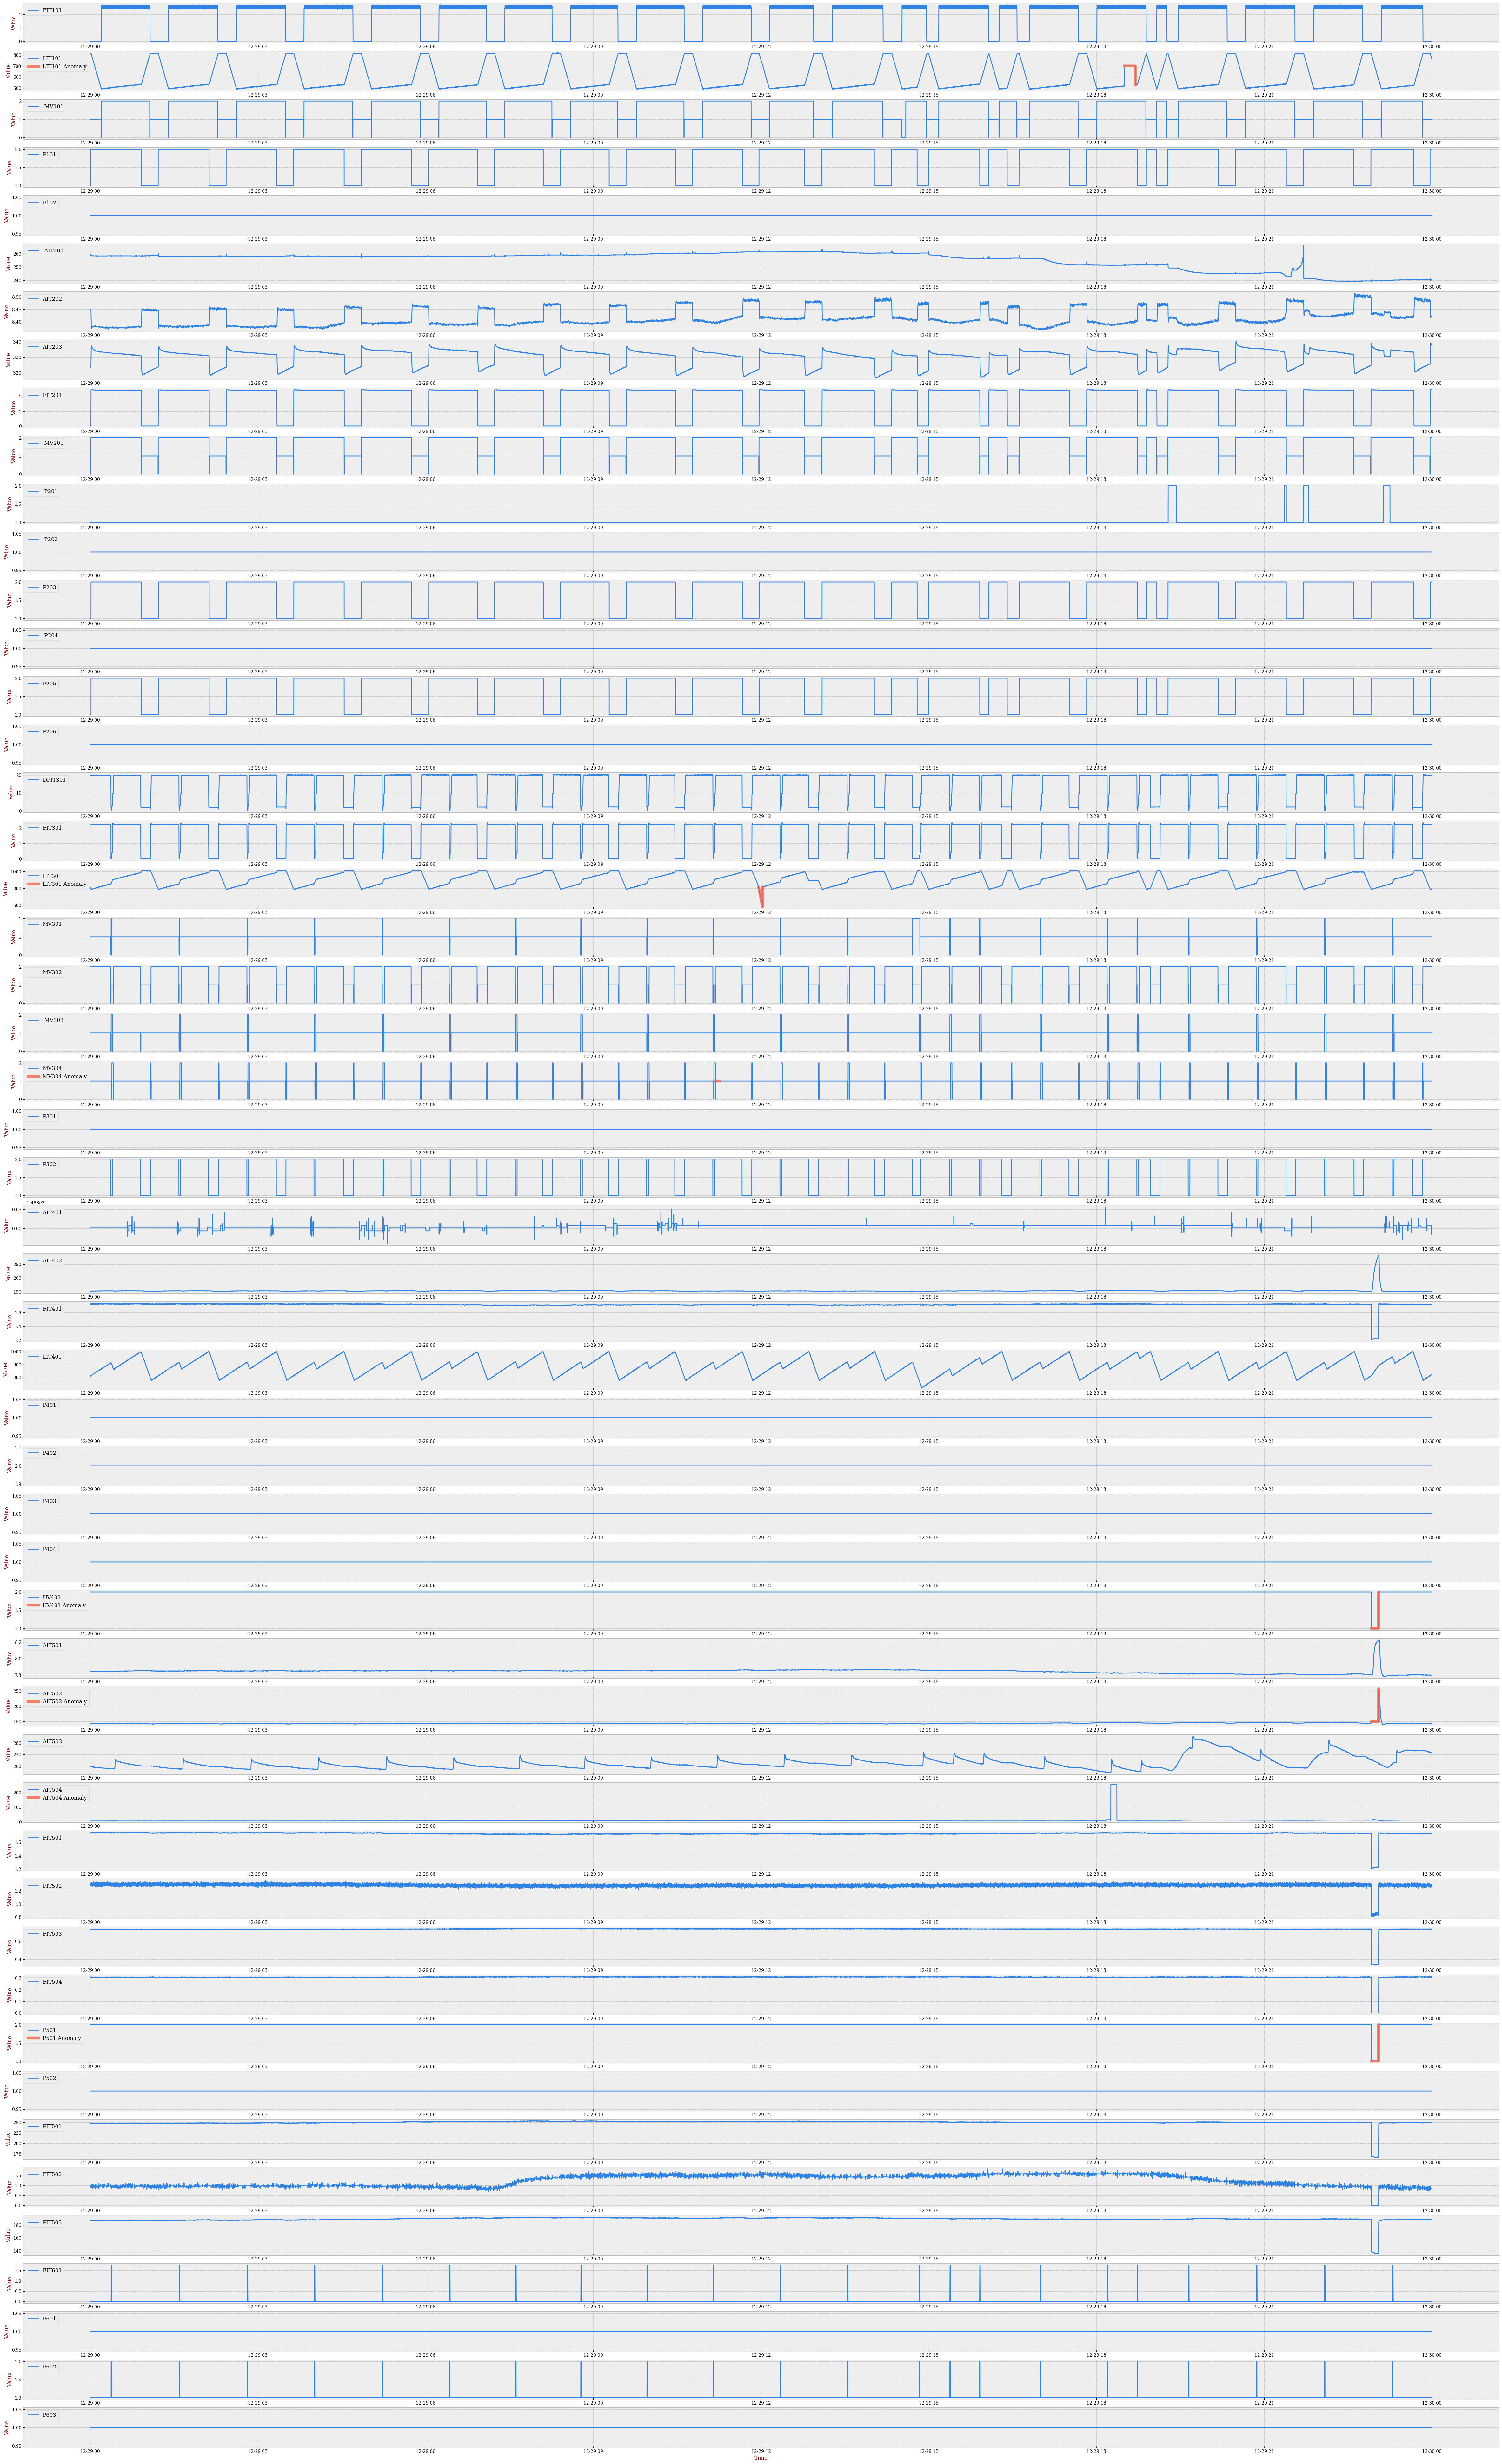

In [8]:
x = time_start + np.arange(0, time_len, 1)
idx_start = int((time_start - df_time_start) / np.timedelta64(1, 's'))
idx_end = int((time_end - df_time_start) / np.timedelta64(1, 's'))

with plt.style.context('bmh'):
    font = {'color': 'darkred', 'size': 12, 'family': 'serif'}
    font_legend = {'size': 12, 'family': 'serif'}

    fig, axs = plt.subplots(51, 1, figsize=(60, 100))

    for i in range(51):
        axs[i].plot(x, df.iloc[idx_start:idx_end, i+1], label=df.columns[i+1], color='#2f83e4')
        axs[i].set_xlabel('Time', fontdict=font)
        axs[i].set_ylabel('Value', fontdict=font)
        axs[i].legend(loc='upper left', prop=font_legend)
        labels = axs[i].get_xticklabels() + axs[i].get_yticklabels()
        [label.set_fontname('serif') for label in labels]

        if df.columns[i+1] in anomaly_feature:
            idx = anomaly_feature.index(df.columns[i+1])
            anomaly_idx = anomaly_time_start[idx] + np.arange(0, int((anomaly_time_end[idx] - anomaly_time_start[idx])/np.timedelta64(1, 's')), 1)
            anomaly_idx_start = int((anomaly_time_start[idx] - time_start)/np.timedelta64(1, 's'))
            anomaly_idx_end = int((anomaly_time_end[idx] - time_start)/np.timedelta64(1, 's'))
            axs[i].plot(anomaly_idx, df.iloc[idx_start + anomaly_idx_start:idx_start + anomaly_idx_end, i+1], label='{} Anomaly'.format(df.columns[i+1]), color='tomato', linewidth=6, alpha=0.8)
            axs[i].legend(loc='upper left', prop=font_legend)

plt.savefig('../fig/swat-2015.png')